## Lending Club Case Study Analysis

#### Importing the required python modules for our analysis

In [885]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

#### Reading the Data

In [887]:
df = pd.read_csv("loan.csv",header=0)

#### Loading the Dataframe and checking basic info about the dataframe

In [889]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [890]:
df.shape

(39717, 111)

In [891]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


### Data Cleaning and Manipulation

In [893]:
(df.isnull().sum()*100)/len(df)

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

#### It is observed that there are many columns that are having all the values as null. Dropping these columns as they don't have significance in our analysis

In [895]:
df = df.dropna(axis=1,how='all')
df.shape

(39717, 57)

In [896]:
df = df.dropna(axis=0,how='all')

In [897]:
df.shape

(39717, 57)

#### Checking for Duplicate rows in the dataframe

In [899]:
duplicate_mask = df.duplicated(keep=False)
duplicate_rows = df[duplicate_mask]
print(duplicate_rows)

Empty DataFrame
Columns: [id, member_id, loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, installment, grade, sub_grade, emp_title, emp_length, home_ownership, annual_inc, verification_status, issue_d, loan_status, pymnt_plan, url, desc, purpose, title, zip_code, addr_state, dti, delinq_2yrs, earliest_cr_line, inq_last_6mths, mths_since_last_delinq, mths_since_last_record, open_acc, pub_rec, revol_bal, revol_util, total_acc, initial_list_status, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, next_pymnt_d, last_credit_pull_d, collections_12_mths_ex_med, policy_code, application_type, acc_now_delinq, chargeoff_within_12_mths, delinq_amnt, pub_rec_bankruptcies, tax_liens]
Index: []

[0 rows x 57 columns]


In [900]:
df = df.drop_duplicates()

In [901]:
df.shape

(39717, 57)

#### Checking for Columns that are single valued as they won't contribute to our analysis

In [903]:
unique_counts = df.nunique()
single_value_columns = unique_counts[unique_counts == 1].index.tolist()
print(single_value_columns)

['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']


#### Dropping single valued columns

In [905]:
df = df.drop(single_value_columns,axis=1)
df.shape

(39717, 48)

#### Now we have 48 columns out of which some correspond to the post approval of loan
+  We are analysing the user details and the driving factors of loan defaulting before approving loan.
+  So we can safely remove the columns or variables corresponding to that scenario.
+  Also there are some columns such as "id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state".
+  The above features or columns doesn't contribute to the loan defaulting in any way due to irrelevant information. So removing them.
+  "desc" has description(text data) and does not contribute to the EDA analysis.
+  "out_prncp_inv", "total_pymnt_inv", are useful for investors but not contribute to the loan defaulting analysis. So removing them.
+  "funded_amnt" is not needed because we only need info as to how much is funded in actual. As we have "funded_amnt_inv" , we can remove the earlier 
   column.

#### List of post-approval columns
+ delinq_2yrs
+ revol_bal
+ out_prncp
+ total_pymnt
+ total_rec_prncp
+ total_rec_int
+ total_rec_late_fee
+ recoveries
+ collection_recovery_fee
+ last_pymnt_d
+ last_pymnt_amnt
+ next_pymnt_d
+ chargeoff_within_12_mths
+ mths_since_last_delinq
+ mths_since_last_record

In [908]:
df.drop(["id", "member_id", "url", "title", "emp_title",  "last_credit_pull_d","desc","out_prncp_inv","total_pymnt_inv","funded_amnt", "delinq_2yrs", "revol_bal", "out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "next_pymnt_d" , "mths_since_last_delinq", "mths_since_last_record"], axis = 1, inplace = True)
df.shape

(39717, 24)

#### Columns with missing values

In [910]:
(df.isna().sum()/len(df.index))*100

loan_amnt               0.000000
funded_amnt_inv         0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_length              2.706650
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
zip_code                0.000000
addr_state              0.000000
dti                     0.000000
earliest_cr_line        0.000000
inq_last_6mths          0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_util              0.125891
total_acc               0.000000
pub_rec_bankruptcies    1.754916
dtype: float64

#### Handling the missing value

In [912]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 0 to 39716
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt_inv       39717 non-null  float64
 2   term                  39717 non-null  object 
 3   int_rate              39717 non-null  object 
 4   installment           39717 non-null  float64
 5   grade                 39717 non-null  object 
 6   sub_grade             39717 non-null  object 
 7   emp_length            38642 non-null  object 
 8   home_ownership        39717 non-null  object 
 9   annual_inc            39717 non-null  float64
 10  verification_status   39717 non-null  object 
 11  issue_d               39717 non-null  object 
 12  loan_status           39717 non-null  object 
 13  purpose               39717 non-null  object 
 14  zip_code              39717 non-null  object 
 15  addr_state         

#### Standardizing the data

In [914]:
df['int_rate']=df['int_rate'].str.rstrip('%')
print(df['int_rate'])

0        10.65
1        15.27
2        15.96
3        13.49
4        12.69
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 39717, dtype: object


In [915]:
df['revol_util']=df['revol_util'].str.rstrip('%')

In [916]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 0 to 39716
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt_inv       39717 non-null  float64
 2   term                  39717 non-null  object 
 3   int_rate              39717 non-null  object 
 4   installment           39717 non-null  float64
 5   grade                 39717 non-null  object 
 6   sub_grade             39717 non-null  object 
 7   emp_length            38642 non-null  object 
 8   home_ownership        39717 non-null  object 
 9   annual_inc            39717 non-null  float64
 10  verification_status   39717 non-null  object 
 11  issue_d               39717 non-null  object 
 12  loan_status           39717 non-null  object 
 13  purpose               39717 non-null  object 
 14  zip_code              39717 non-null  object 
 15  addr_state         

#### Imputing Mode value for missing value for the column emp_length

In [918]:
# df.emp_length.fillna('0',inplace=True) #dont replace na values with 0 instead fill it with mode value as shown in the below line
print("Mode : " + df.emp_length.mode()[0])
df.emp_length.value_counts()
df['emp_length']=df.emp_length.str.extract('(\d+)')
df.head()

Mode : 10+ years


,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,zip_code,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies
0,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,...,860xx,AZ,27.65,Jan-85,1,3,0,83.70,9,0.0
1,2500,2500.0,60 months,15.27,59.83,C,C4,1,RENT,30000.0,...,309xx,GA,1.00,Apr-99,5,3,0,9.40,4,0.0
2,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,...,606xx,IL,8.72,Nov-01,2,2,0,98.50,10,0.0
3,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,...,917xx,CA,20.00,Feb-96,1,10,0,21,37,0.0
4,3000,3000.0,60 months,12.69,67.79,B,B5,1,RENT,80000.0,...,972xx,OR,17.94,Jan-96,0,15,0,53.90,38,0.0


#### Changing the Datatype of columns to integer type

In [920]:
columns1=['loan_amnt','int_rate','funded_amnt_inv','installment','annual_inc','dti']
df[columns1]=df[columns1].apply(pd.to_numeric)

In [921]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 0 to 39716
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt_inv       39717 non-null  float64
 2   term                  39717 non-null  object 
 3   int_rate              39717 non-null  float64
 4   installment           39717 non-null  float64
 5   grade                 39717 non-null  object 
 6   sub_grade             39717 non-null  object 
 7   emp_length            38642 non-null  object 
 8   home_ownership        39717 non-null  object 
 9   annual_inc            39717 non-null  float64
 10  verification_status   39717 non-null  object 
 11  issue_d               39717 non-null  object 
 12  loan_status           39717 non-null  object 
 13  purpose               39717 non-null  object 
 14  zip_code              39717 non-null  object 
 15  addr_state         

#### Percentage of missing values for revol_util is very low so we can drop those rows

In [923]:
df.dropna(axis = 0, subset = ['revol_util'] , inplace = True)
df.revol_util.isna().sum()

0

#### Data Clean on pub_rec_bankruptcies column as it will be used in analysis

In [925]:
print('Before cleaning pub_rec_bankruptcies')
print(df.pub_rec_bankruptcies.isnull().sum())

# Replacing the 'Not Known' with NA values
df.pub_rec_bankruptcies.fillna('Not Known',inplace=True)

print('After cleaning pub_rec_bankruptcies')
print(df.pub_rec_bankruptcies.isnull().sum())

Before cleaning pub_rec_bankruptcies
697
After cleaning pub_rec_bankruptcies
0


#### Dropping the rows for loan_status=='Current' as the loan currently in progress and cannot contribute to conclusive evidence

In [927]:
df = df[df.loan_status != "Current"]
df.shape

(38527, 24)

#### converting issue_d`to date type

In [929]:
df['issue_d'] = pd.to_datetime(df.issue_d, format='%b-%y')
df['issue_d']

0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
5       2011-12-01
           ...    
39712   2007-07-01
39713   2007-07-01
39714   2007-07-01
39715   2007-07-01
39716   2007-06-01
Name: issue_d, Length: 38527, dtype: datetime64[ns]

##### Creating two more columns issue_year and issue_month from issue_d(issue date) column

In [931]:
df['issue_year']=pd.DatetimeIndex(df['issue_d']).year
df['issue_month']=pd.DatetimeIndex(df['issue_d']).month

#### Outlier Detection

<AxesSubplot:xlabel='annual_inc'>

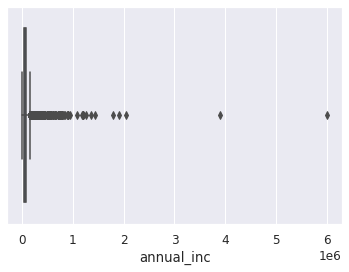

In [933]:
sns.boxplot(df['annual_inc'])

#### The above graph clearly shows the presence of outliers
+ The values after 95 percentile seems to be disconected from the general distribution and also there is huge increase in the value for small quantile variation.
+ So, considering threshold for removing outliers as 0.95
+ So, Removing them.

In [935]:
quantile_info = df.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info

0.50     59000.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234000.0
Name: annual_inc, dtype: float64

<AxesSubplot:xlabel='annual_inc'>

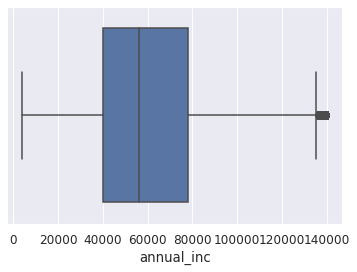

In [936]:
per_95_annual_inc = df['annual_inc'].quantile(0.95)
df = df[df.annual_inc <= per_95_annual_inc]
sns.boxplot(df.annual_inc)

In [937]:
# describe the annual income details
df['annual_inc'].describe()

count     36606.000000
mean      60890.563839
std       27741.337421
min        4000.000000
25%       40000.000000
50%       56000.000000
75%       78000.000000
max      140004.000000
Name: annual_inc, dtype: float64

#### Observation
The Annual income of most if applicants lies between 40k-75k.

<AxesSubplot:xlabel='dti'>

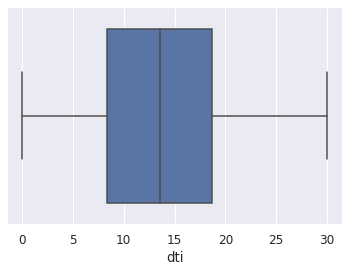

In [939]:
sns.boxplot(df.dti)

In [940]:
# describe the Loan Amount
df['dti'].describe()

count    36606.000000
mean        13.450146
std          6.660418
min          0.000000
25%          8.350000
50%         13.580000
75%         18.720000
max         29.990000
Name: dti, dtype: float64

<AxesSubplot:xlabel='loan_amnt'>

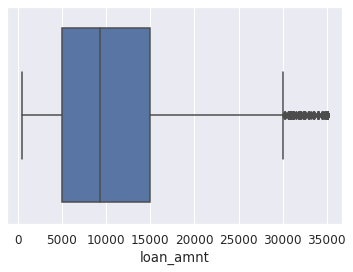

In [941]:
sns.boxplot(df.loan_amnt)

In [942]:
# describe the Loan Amount
df['loan_amnt'].describe()

count    36606.000000
mean     10690.058324
std       7048.412687
min        500.000000
25%       5000.000000
50%       9250.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

#### Observation -
Most of the loan amount applied was in the range of 5k-14k.
Max Loan amount applied was ~27k.

<AxesSubplot:xlabel='funded_amnt_inv'>

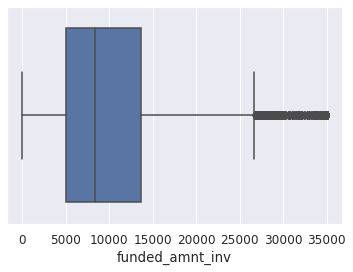

In [944]:
sns.boxplot(df.funded_amnt_inv)

In [945]:
# describe the funded amount
df['funded_amnt_inv'].describe()

count    36606.000000
mean      9902.311039
std       6730.696329
min          0.000000
25%       4988.276705
50%       8396.342174
75%      13649.999283
max      35000.000000
Name: funded_amnt_inv, dtype: float64

<AxesSubplot:xlabel='int_rate'>

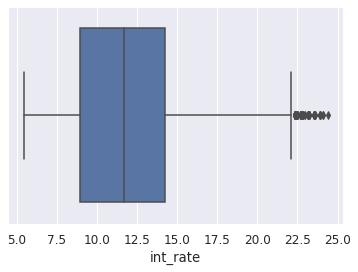

In [946]:
sns.boxplot(df.int_rate)

In [947]:
# describe the interest rate
df['int_rate'].describe()

count    36606.000000
mean        11.883216
std          3.666065
min          5.420000
25%          8.940000
50%         11.710000
75%         14.270000
max         24.400000
Name: int_rate, dtype: float64

#### Observation
Most of the applicant's rate of interesrt is between in the range of 8%-14%.Average Rate of interest of rate is 11.7 %

Though there are some values far from distribution, the distribution is pretty continuous and there is no need to remove outliers / extreme values for these above columns.

#### Bucketing different variables for better analysis

In [951]:


# Bucketting Loan Amount
def bucket_loan_amnt(column):
    if column <= 5000:
        return '0 - 5K'  # 25% quartile
    elif (column >5000) and (column <= 10000):
        return '5K - 10K'
    elif (column >10000) and (column <= 15000):
        return '10K - 15K'
    else:
        return '15K - above' # 75% quartile

df['loan_amnt_b'] = df.apply(lambda x : bucket_loan_amnt(x['loan_amnt']), axis = 1)

In [952]:
#Bucketing Annual Income
def bucket_annual_inc(column):
    if column <= 40000:
        return '0 - 40k' # 25% quartile
    elif (column >40000) and (column <= 50000):
        return '40k - 50k'
    elif (column >50000) and (column <= 60000):
        return '50k to 60k'
    elif (column >60000) and (column <= 70000):
        return '60k to 70k'
    elif (column >70000) and (column <= 80000):
        return '70k to 80k'
    else:
        return '80k - above' # 75% quartile

df['annual_inc_b'] = df.apply(lambda x: bucket_annual_inc(x['annual_inc']), axis = 1)

In [953]:
# Bucketing interest rate
def bucket_int_rate(column):
    if column <= 9:
        return 'Very Low' # 25% quartile
    elif (column >9) and (column <= 11):
        return 'Low'
    elif (column >11) and (column <= 13):
        return 'Moderate'
    elif (column >13) and (column <= 15):
        return 'High'
    else:
        return 'Very High' # 75% quartile

df['int_rate_b'] = df.apply(lambda x : bucket_int_rate(x.int_rate), axis = 1)

In [954]:
def bucket_dti(column):
    if column <= 8:
        return 'Very Low' # 25% quartile
    elif (column >8) and (column <= 12):
        return 'Low'
    elif (column >12) and (column <= 16):
        return 'Moderate'
    elif (column >16) and (column <= 20):
        return 'High'
    else:
        return 'Very High' # 75% quartile

df['dti_b'] = df.apply(lambda x : bucket_dti(x.dti), axis = 1)

#### Univariate Analysis

In [956]:
counts = df['loan_status'].value_counts()
percentages = counts.apply(lambda x: (x / df['loan_status'].count()) * 100)
print(percentages)

Fully Paid     85.242856
Charged Off    14.757144
Name: loan_status, dtype: float64


<AxesSubplot:xlabel='loan_status', ylabel='count'>

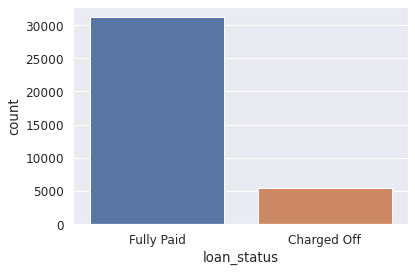

In [957]:
sns.countplot(x = 'loan_status', data = df)

#### Observations -
The following plot shows that around 14% loans were charged off out of the total loans issued

<AxesSubplot:xlabel='loan_amnt_b', ylabel='count'>

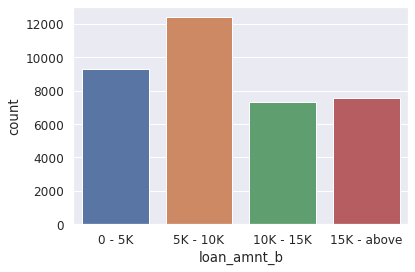

In [959]:
sns.countplot(x = 'loan_amnt_b', data = df)

<AxesSubplot:xlabel='grade', ylabel='count'>

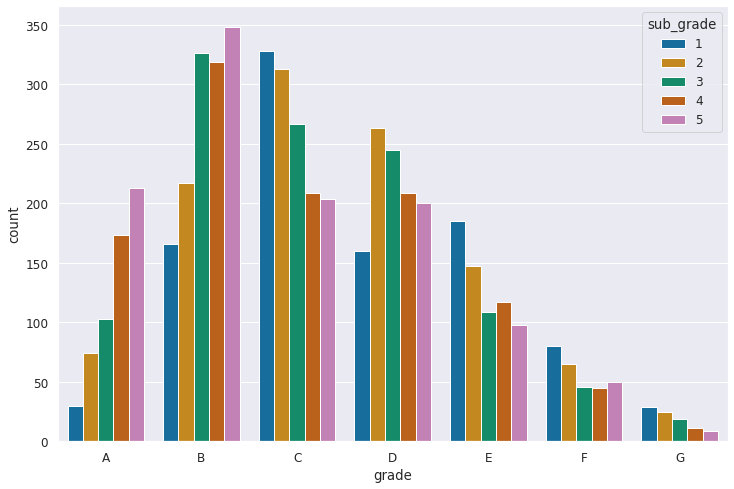

In [960]:
df.sub_grade = pd.to_numeric(df.sub_grade.apply(lambda x : x[-1]))
df.sub_grade.head()
fig, ax = plt.subplots(figsize=(12,8))
sns.set_palette('colorblind')
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade',data = df[df.loan_status == 'Charged Off'])

<AxesSubplot:xlabel='grade', ylabel='count'>

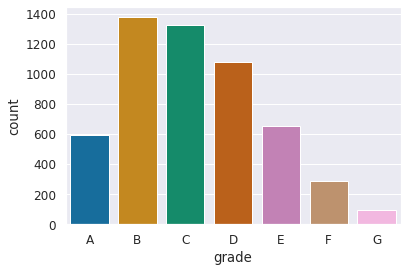

In [961]:
sns.countplot(x = 'grade', data = df[df.loan_status == 'Charged Off'], order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

#### Observation - 
Most of the defaulters are people who are in grade B, C followed by D,E and A. Lowest defaulters are from grade G followed by F

<AxesSubplot:xlabel='term', ylabel='count'>

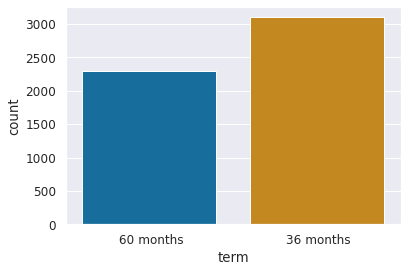

In [963]:
sns.countplot(x='term',data=df[df.loan_status=="Charged Off"])

['RENT' 'OWN' 'MORTGAGE' 'OTHER']


<AxesSubplot:xlabel='home_ownership', ylabel='count'>

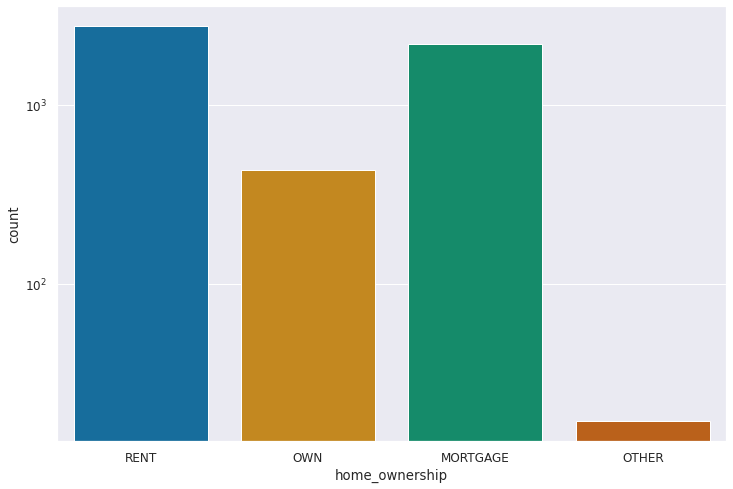

In [964]:

df['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)
print(df['home_ownership'].unique())
fig, ax = plt.subplots(figsize = (12,8))
ax.set(yscale = 'log')
sns.countplot(x='home_ownership',data=df[df.loan_status=="Charged Off"])

#### Observation - 
The Count plot shows that most of them living in rented home or mortgazed their home.

<AxesSubplot:xlabel='count', ylabel='purpose'>

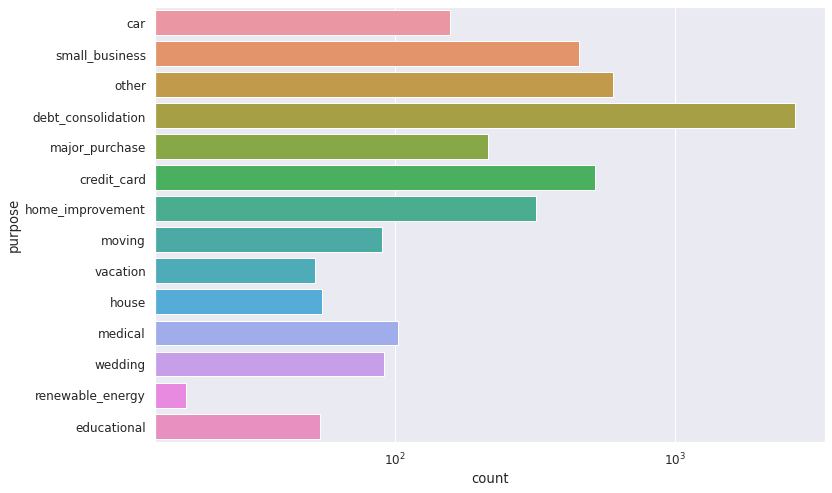

In [966]:
fig, ax = plt.subplots(figsize = (12,8))
ax.set(xscale = 'log')
sns.countplot(y ='purpose', data=df[df.loan_status == 'Charged Off'])

#### Observation - 
The Count Plot shows that most of the loans were taken for the purpose of debt consolidation & paying credit card bill..            Number of charged off count also high too for these loans.

<AxesSubplot:xlabel='annual_inc_b', ylabel='count'>

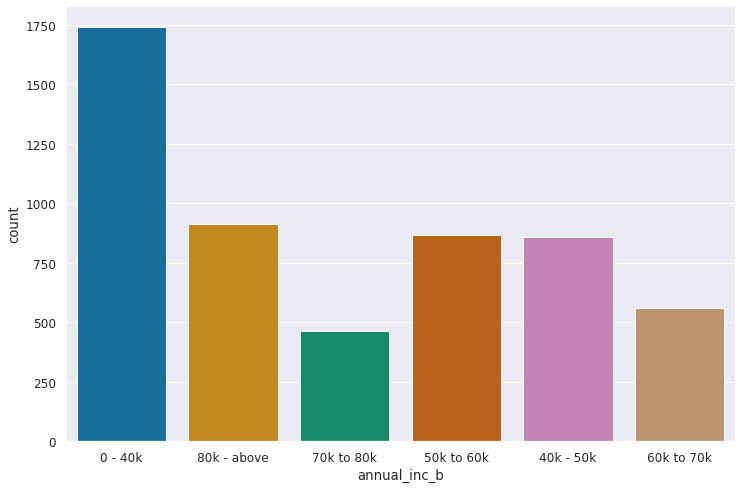

In [968]:
plt.figure(figsize=(12, 8))
sns.countplot(x='annual_inc_b',data=df[df.loan_status=="Charged Off"])

#### Observation - 
We observe that most of the charged-off loans are from the people with annual income between 0-40K.

<AxesSubplot:xlabel='int_rate_b', ylabel='count'>

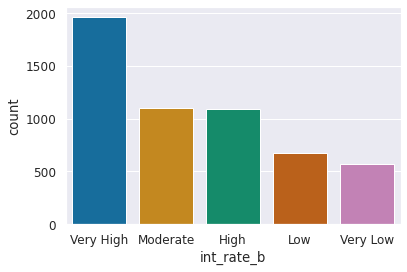

In [970]:
sns.countplot(x='int_rate_b',data=df[df.loan_status=="Charged Off"])

#### Observation - 
We see that people who have interest rate categorized as "Very High" that is interest rate > 13 are more likely to default on their loans.

<AxesSubplot:xlabel='dti_b', ylabel='count'>

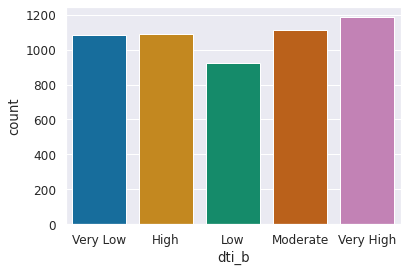

In [971]:
sns.countplot(x='dti_b',data=df[df.loan_status=="Charged Off"])

#### Observation - 
We can observe that the charged-of ratio is more or less is the same acros all dti groups.

<AxesSubplot:xlabel='pub_rec_bankruptcies', ylabel='count'>

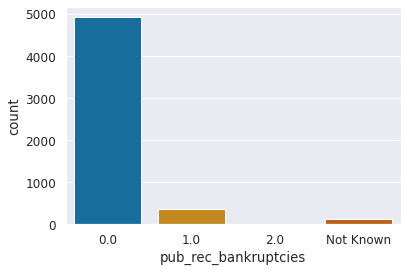

In [972]:
sns.countplot(x='pub_rec_bankruptcies',data=df[df.loan_status=="Charged Off"])

<AxesSubplot:xlabel='verification_status', ylabel='count'>

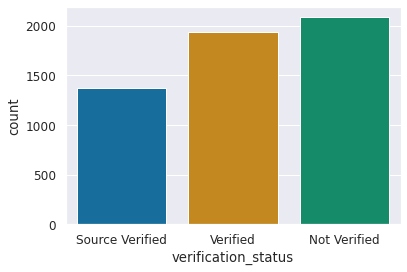

In [973]:
sns.countplot(x='verification_status',data=df[df.loan_status=="Charged Off"])

<AxesSubplot:xlabel='inq_last_6mths', ylabel='count'>

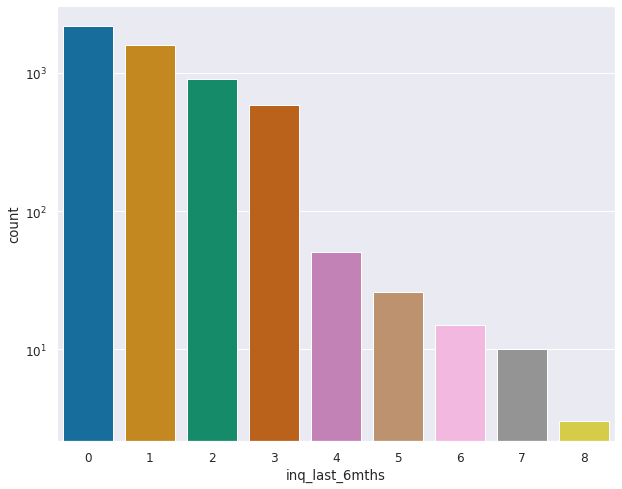

In [974]:
fig,ax = plt.subplots(figsize = (10,8))
ax.set_yscale('log')
sns.countplot(x="inq_last_6mths",data=df[df.loan_status=="Charged Off"])

<AxesSubplot:xlabel='emp_length', ylabel='count'>

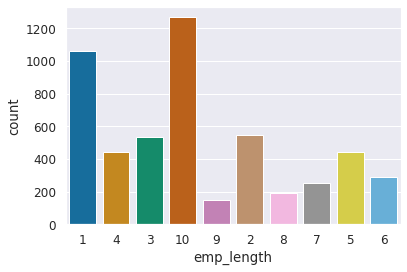

In [975]:
sns.countplot(x='emp_length',data=df[df.loan_status=="Charged Off"])

<AxesSubplot:xlabel='issue_month', ylabel='count'>

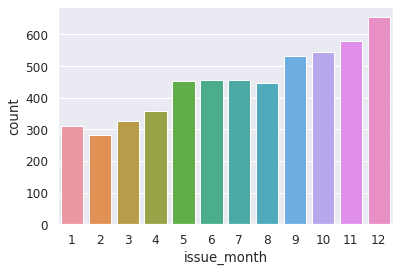

In [978]:
sns.countplot(x="issue_month",data=df[df.loan_status=="Charged Off"])

<AxesSubplot:xlabel='pub_rec', ylabel='count'>

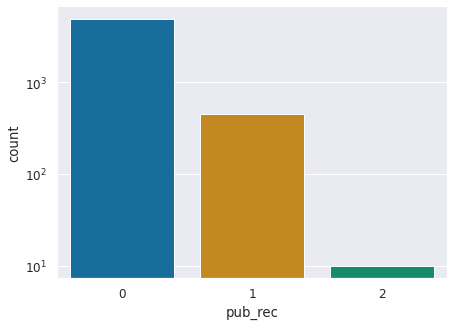

In [980]:
fig,ax = plt.subplots(figsize = (7,5))
ax.set_yscale('log')
sns.countplot(x='pub_rec',data=df[df.loan_status=="Charged Off"])

#### Observation -
Creating Buckets for open_acc, revol_util and total_acc columns for our analysis

In [983]:
df['open_acc_groups'] = pd.cut(df['open_acc'],bins = 5,precision =0,labels=['2-10','10-19','19-27','27-36','36-44'])
df['revol_util_groups'] = pd.cut(df['revol_util'], bins=5,precision =0,labels=['0-20','20-40','40-60','60-80','80-100'])
df['total_acc_groups'] = pd.cut(df['total_acc'], bins=5,precision =0,labels=['2-20','20-37','37-55','55-74','74-90'])

<AxesSubplot:xlabel='open_acc_groups', ylabel='count'>

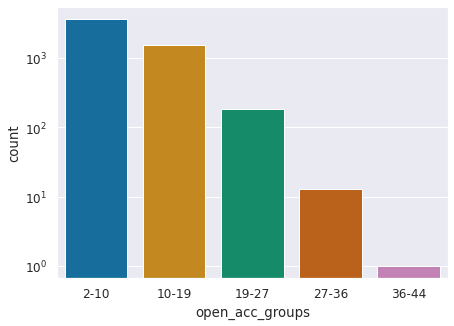

In [984]:
fig, ax = plt.subplots(figsize = (7,5))
ax.set_yscale('log')
sns.countplot(x='open_acc_groups', data=df[df.loan_status == 'Charged Off'])

<AxesSubplot:xlabel='revol_util_groups', ylabel='count'>

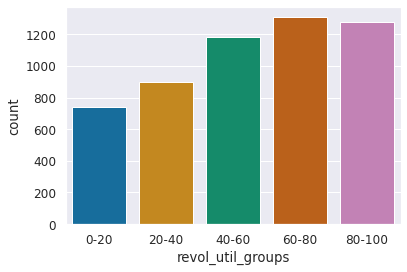

In [985]:
sns.countplot(x='revol_util_groups', data=df[df.loan_status == 'Charged Off'])

<AxesSubplot:xlabel='total_acc_groups', ylabel='count'>

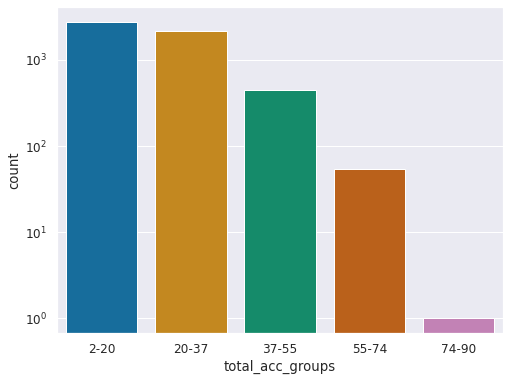

In [986]:
fig, ax = plt.subplots(figsize = (8,6))
ax.set_yscale('log')
sns.countplot(x='total_acc_groups', data=df[df.loan_status == 'Charged Off'])

<AxesSubplot:xlabel='funded_amnt_inv_group', ylabel='count'>

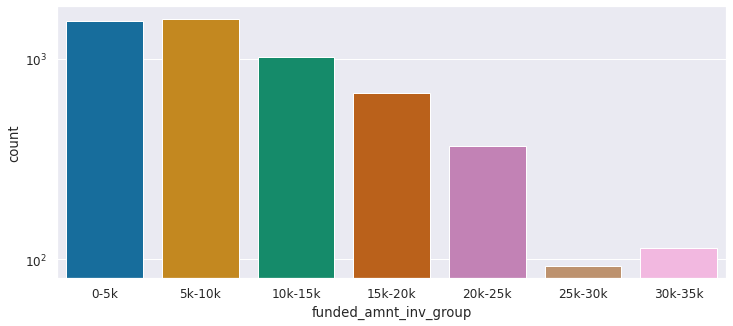

In [987]:
df['funded_amnt_inv_group'] = pd.cut(df['funded_amnt_inv'], bins=7,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k']) ## bin is starting from -35?
fig,ax = plt.subplots(figsize = (12,5))
ax.set_yscale('log')
sns.countplot(x='funded_amnt_inv_group', data=df[df['loan_status']=='Charged Off'])

<AxesSubplot:xlabel='installment_groups', ylabel='count'>

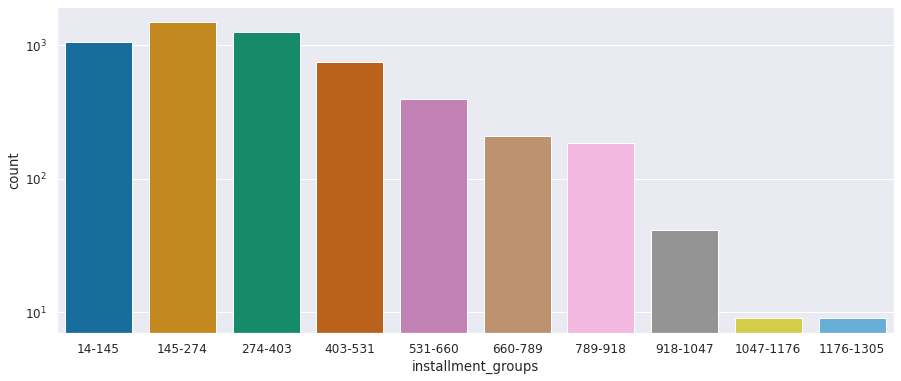

In [988]:
df['installment_groups'] = pd.cut(df['installment'], bins=10,precision =0,labels=['14-145','145-274','274-403','403-531','531-660','660-789','789-918','918-1047','1047-1176','1176-1305'])
fig,ax = plt.subplots(figsize = (15,6))
ax.set_yscale('log')
sns.countplot(x='installment_groups', data=df[df['loan_status']=='Charged Off'])

<AxesSubplot:xlabel='addr_state', ylabel='count'>

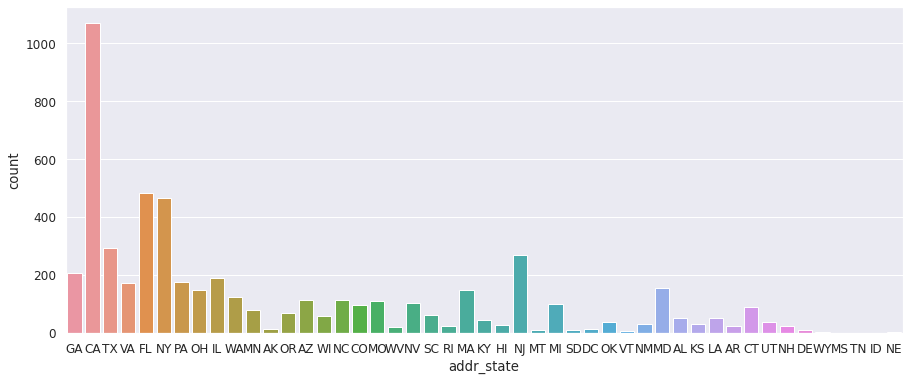

In [989]:
fig,ax = plt.subplots(figsize = (15,6))
sns.countplot(x="addr_state",data=df[df.loan_status=="Charged Off"])

### Correlation Analysis

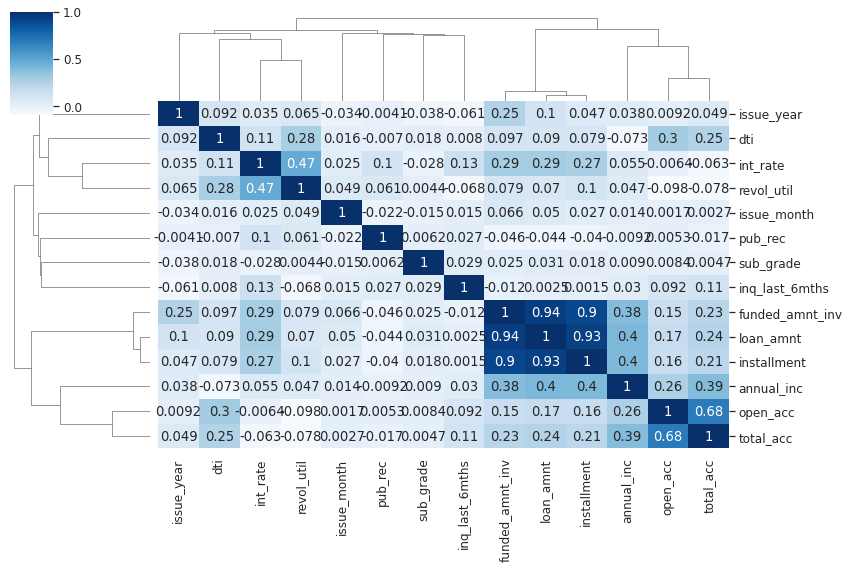

In [991]:
corr_loan = df
corr = corr_loan.corr()
sns.set(font_scale=1.1)
sns.clustermap(corr, annot=True, figsize=(12, 8), cmap="Blues")
plt.show()

#### Observation - 
+ Annual Income to Debt To Income Ratio i.e. dti are negatively correlated
+ Loan_amnt has negative correlation with pub_rec_bankrupticies
+ Loan Amount,Investor Amount and Funding Amount are strongly correlated
+ Positive correlation between Annual Income and employment years
+ Positive correlation between annual income and funded amount that means people with high income gets high funded amount
+ Positive correlation between annual income and total payment
+ Term has a strong correlation with loan amount
+ Term has a strong correlation with interest rate

### Bivariate Analysis

In [992]:
inc_range_vs_loan = df.groupby(['annual_inc_b', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
inc_range_vs_loan['Total'] = inc_range_vs_loan['Charged Off']+ inc_range_vs_loan['Fully Paid']
inc_range_vs_loan['Chargedoff_Proportion'] = inc_range_vs_loan['Charged Off'] / inc_range_vs_loan['Total']
inc_range_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,annual_inc_b,Charged Off,Fully Paid,Total,Chargedoff_Proportion
0,0 - 40k,1740,7924,9664,0.180050
2,50k to 60k,867,4703,5570,0.155655
1,40k - 50k,858,4825,5683,0.150977
3,60k to 70k,559,3537,4096,0.136475
4,70k to 80k,464,3059,3523,0.131706
5,80k - above,914,7156,8070,0.113259


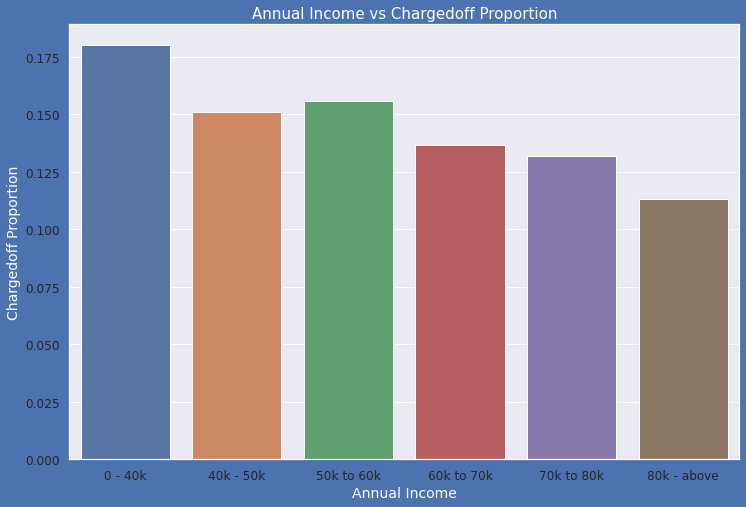

In [993]:
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Annual Income vs Chargedoff Proportion',fontsize=15,color = 'w')
ax1=sns.barplot(x='annual_inc_b', y='Chargedoff_Proportion', data=inc_range_vs_loan)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
ax1.set_xlabel('Annual Income',fontsize=14,color='w')
plt.show()

#### Observation - 
+ Income range of 80000+ has less chance of getting charged off.
+ Income range of -20000 has high chances of charged off.
+ With increase in annual income charged off proportion got decreased. So, they are inversely proportional

In [994]:
interest_vs_loan = df.groupby(['int_rate_b', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
interest_vs_loan['Total'] = interest_vs_loan['Charged Off']+ interest_vs_loan['Fully Paid']
interest_vs_loan['Chargedoff_Proportion'] = interest_vs_loan['Charged Off'] / interest_vs_loan['Total']
interest_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,int_rate_b,Charged Off,Fully Paid,Total,Chargedoff_Proportion
3,Very High,1963,5462,7425,0.264377
0,High,1087,5184,6271,0.173338
2,Moderate,1100,6171,7271,0.151286
1,Low,677,5548,6225,0.108755
4,Very Low,575,8839,9414,0.061079


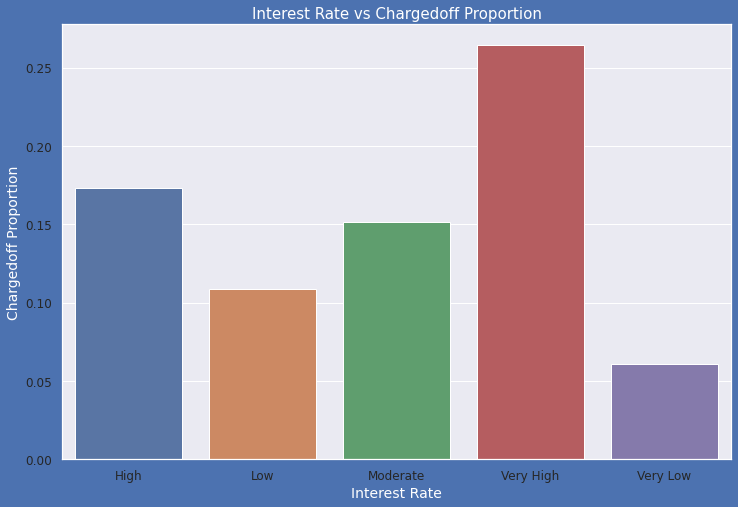

In [995]:
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Interest Rate vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='int_rate_b', y='Chargedoff_Proportion', data=interest_vs_loan)
ax1.set_xlabel('Interest Rate',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

#### Observation - 
+ Interest Rates which is less than 10% have very less chances of defaulting on their loan
+ Charged off proportion increases with higher interest rates

In [996]:
home_ownership_vs_loan = df.groupby(['home_ownership', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
home_ownership_vs_loan['Total'] = home_ownership_vs_loan['Charged Off']+ home_ownership_vs_loan['Fully Paid']
home_ownership_vs_loan['Chargedoff_Proportion'] = home_ownership_vs_loan['Charged Off'] / home_ownership_vs_loan['Total']
home_ownership_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,home_ownership,Charged Off,Fully Paid,Total,Chargedoff_Proportion
1,OTHER,17,77,94,0.180851
3,RENT,2763,15237,18000,0.153500
2,OWN,432,2415,2847,0.151739
0,MORTGAGE,2190,13475,15665,0.139802


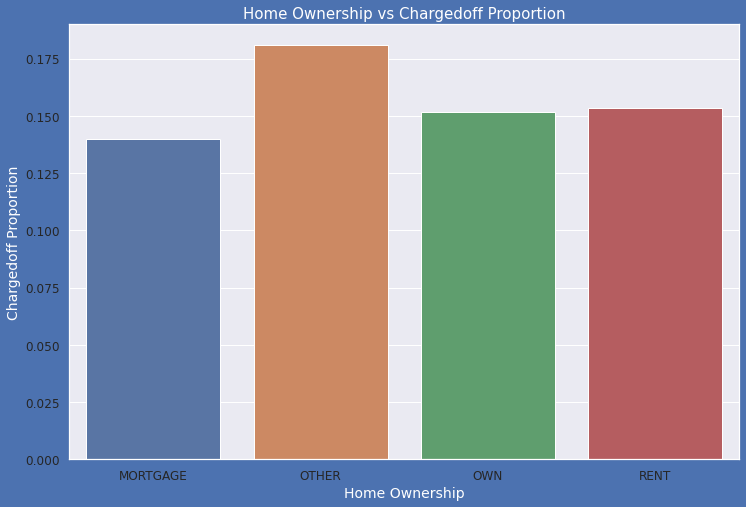

In [997]:
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Home Ownership vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='home_ownership', y='Chargedoff_Proportion', data=home_ownership_vs_loan)
ax1.set_xlabel('Home Ownership',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

#### Observation
No strong evidence or correlation observed

In [998]:
purpose_vs_loan = df.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purpose_vs_loan['Total'] = purpose_vs_loan['Charged Off']+ purpose_vs_loan['Fully Paid']
purpose_vs_loan['Chargedoff_Proportion'] = purpose_vs_loan['Charged Off'] / purpose_vs_loan['Total']
purpose_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,purpose,Charged Off,Fully Paid,Total,Chargedoff_Proportion
11,small_business,454,1168,1622,0.279901
10,renewable_energy,18,77,95,0.189474
3,educational,54,255,309,0.174757
8,moving,90,458,548,0.164234
9,other,601,3085,3686,0.163049
5,house,55,283,338,0.162722
7,medical,103,536,639,0.161189
2,debt_consolidation,2672,14621,17293,0.154513
12,vacation,52,312,364,0.142857
4,home_improvement,319,2232,2551,0.125049


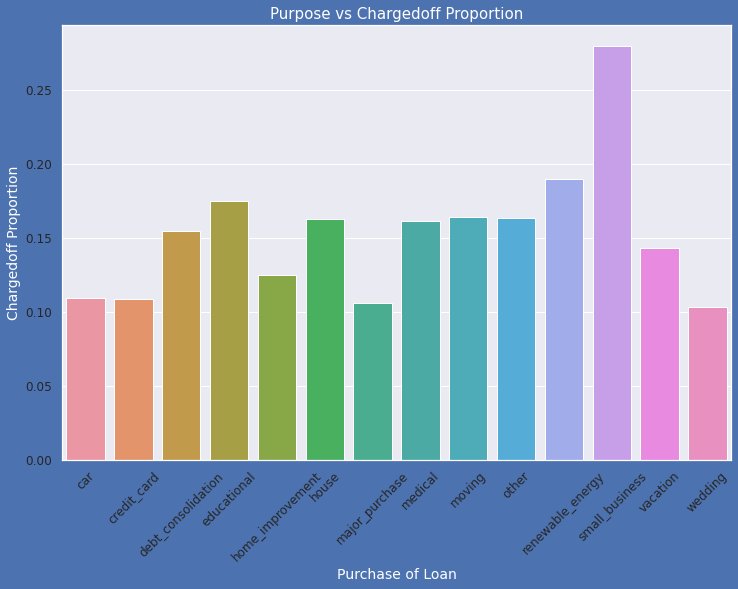

In [999]:
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Purpose vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='purpose', y='Chargedoff_Proportion', data=purpose_vs_loan)
ax1.set_xlabel('Purchase of Loan',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.xticks(rotation=45)
plt.show()

#### Observation -
Small business have the highest chances of defaulting of loans followed by debt consolidation, renewable energy

In [1000]:
dti_vs_loan = df.groupby(['dti_b', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
dti_vs_loan['Total'] = dti_vs_loan['Charged Off']+ dti_vs_loan['Fully Paid']
dti_vs_loan['Chargedoff_Proportion'] = dti_vs_loan['Charged Off'] / dti_vs_loan['Total']
dti_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,dti_b,Charged Off,Fully Paid,Total,Chargedoff_Proportion
3,Very High,1187,5880,7067,0.167964
0,High,1089,5619,6708,0.162343
2,Moderate,1114,6348,7462,0.149290
1,Low,926,5818,6744,0.137307
4,Very Low,1086,7539,8625,0.125913


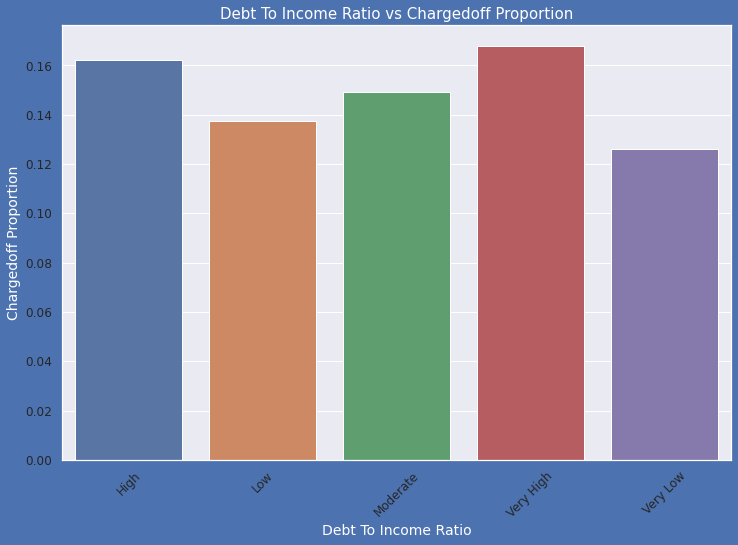

In [1001]:
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Debt To Income Ratio vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='dti_b', y='Chargedoff_Proportion', data=dti_vs_loan)
ax1.set_xlabel('Debt To Income Ratio',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.xticks(rotation=45)
plt.show()

#### Observation - 
+ High dti value have high risk of defaults

In [1002]:
pub_rec_bankruptcies_vs_loan = df.groupby(['pub_rec_bankruptcies', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
pub_rec_bankruptcies_vs_loan['Total'] = pub_rec_bankruptcies_vs_loan['Charged Off']+ pub_rec_bankruptcies_vs_loan['Fully Paid']
pub_rec_bankruptcies_vs_loan['Chargedoff_Proportion'] = pub_rec_bankruptcies_vs_loan['Charged Off'] / pub_rec_bankruptcies_vs_loan['Total']
pub_rec_bankruptcies_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,pub_rec_bankruptcies,Charged Off,Fully Paid,Total,Chargedoff_Proportion
2,2.0,2,3,5,0.400000
1,1.0,361,1237,1598,0.225907
3,Not Known,112,546,658,0.170213
0,0.0,4927,29418,34345,0.143456


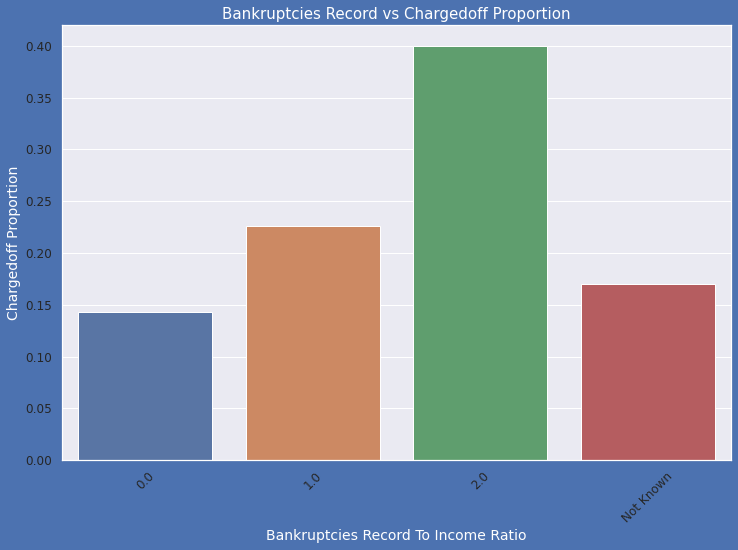

In [1003]:
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Bankruptcies Record vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='pub_rec_bankruptcies', y='Chargedoff_Proportion', data=pub_rec_bankruptcies_vs_loan)
ax1.set_xlabel('Bankruptcies Record To Income Ratio',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.xticks(rotation=45)
plt.show()

#### Observation -
+ Bankruptcies record with 2 is having high impact on loan defaults
+ Lower the Bankruptcies lower the risk.

In [1004]:
issue_year_vs_loan = df.groupby(['issue_year', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
issue_year_vs_loan['Total'] = issue_year_vs_loan['Charged Off']+ issue_year_vs_loan['Fully Paid']
issue_year_vs_loan['Chargedoff_Proportion'] = issue_year_vs_loan['Charged Off'] / issue_year_vs_loan['Total']
issue_year_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,issue_year,Charged Off,Fully Paid,Total,Chargedoff_Proportion
0,2007,41,189,230,0.178261
4,2011,3139,16298,19437,0.161496
1,2008,233,1248,1481,0.157326
3,2010,1425,9569,10994,0.129616
2,2009,564,3900,4464,0.126344


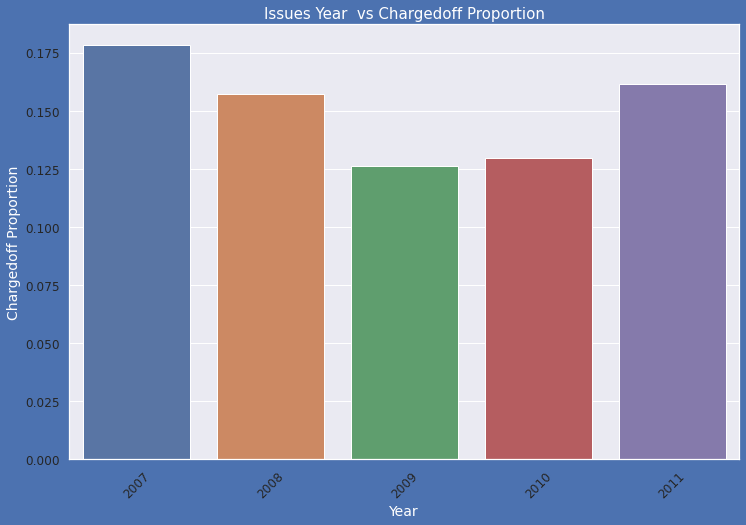

In [1005]:
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Issues Year  vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='issue_year', y='Chargedoff_Proportion', data=issue_year_vs_loan)
ax1.set_xlabel('Year',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.xticks(rotation=45)
plt.show()

#### Observation -
Most number of defaults where in the year 2011 which can be attributed to 2011 Debt ceiling crisis.

In [1006]:
issue_month_vs_loan = df.groupby(['issue_month', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
issue_month_vs_loan['Total'] = issue_month_vs_loan['Charged Off']+ issue_month_vs_loan['Fully Paid']
issue_month_vs_loan['Chargedoff_Proportion'] = issue_month_vs_loan['Charged Off'] / issue_month_vs_loan['Total']
issue_month_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,issue_month,Charged Off,Fully Paid,Total,Chargedoff_Proportion
11,12,655,3361,4016,0.163098
4,5,453,2335,2788,0.162482
8,9,532,2758,3290,0.161702
9,10,545,2983,3528,0.154478
5,6,457,2543,3000,0.152333
10,11,578,3238,3816,0.151468
6,7,456,2734,3190,0.142947
7,8,448,2763,3211,0.139520
0,1,311,1952,2263,0.137428
3,4,359,2352,2711,0.132423


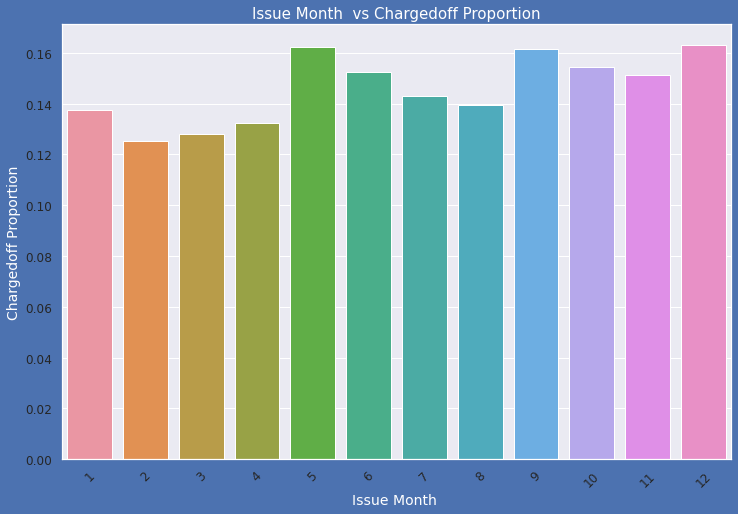

In [1007]:
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Issue Month  vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='issue_month', y='Chargedoff_Proportion', data=issue_month_vs_loan)
ax1.set_xlabel('Issue Month ',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.xticks(rotation=45)
plt.show()

#### Observation - 
+ Maximum number of defaults occured when the loan was sanctioned/issued in Dec.
+ We can see that loans taken during the second half of the year have more chances of getting charged off than first half of the year.

In [1008]:
addr_state_vs_loan = df.groupby(['addr_state', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
addr_state_vs_loan['Total'] = addr_state_vs_loan['Charged Off']+ addr_state_vs_loan['Fully Paid']
addr_state_vs_loan['Chargedoff_Proportion'] = addr_state_vs_loan['Charged Off'] / addr_state_vs_loan['Total']
addr_state_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,addr_state,Charged Off,Fully Paid,Total,Chargedoff_Proportion
28,NE,3.0,2.0,5.0,0.600000
32,NV,103.0,353.0,456.0,0.225877
13,ID,1.0,4.0,5.0,0.200000
40,SD,12.0,49.0,61.0,0.196721
0,AK,13.0,58.0,71.0,0.183099
9,FL,484.0,2167.0,2651.0,0.182573
11,HI,28.0,131.0,159.0,0.176101
24,MO,110.0,536.0,646.0,0.170279
31,NM,30.0,147.0,177.0,0.169492
4,CA,1072.0,5482.0,6554.0,0.163564


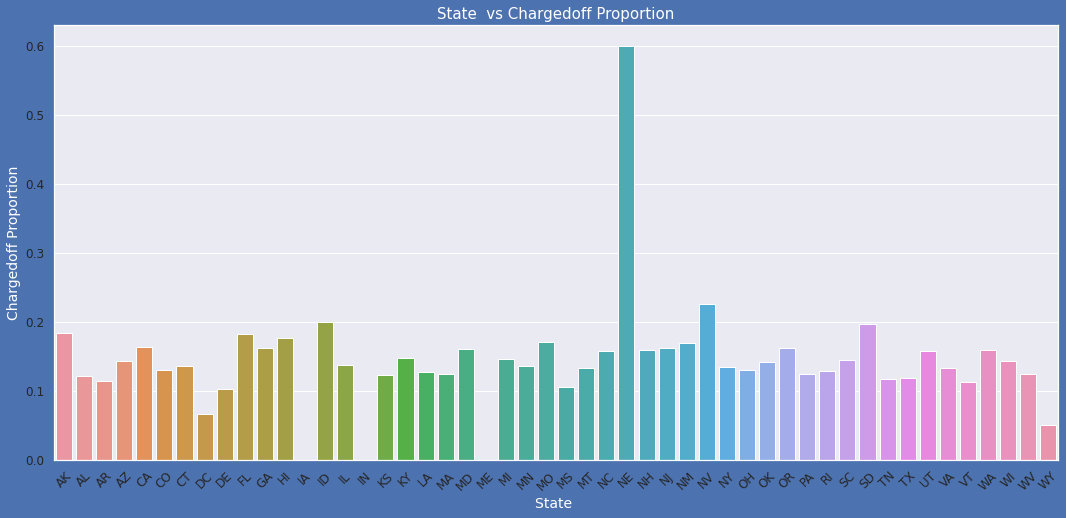

In [1009]:
fig, ax1 = plt.subplots(figsize=(18, 8),facecolor='b')
ax1.set_title('State  vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='addr_state', y='Chargedoff_Proportion', data=addr_state_vs_loan)
ax1.set_xlabel('State ',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.xticks(rotation=45)
plt.show()

#### Observation - 
+ State of NE has a very high chances of getting defaulted on loans
+ State of NV,CA and FL shows good number of charge offs 

In [1010]:
grade_vs_loan = df.groupby(['grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan['Total'] = grade_vs_loan['Charged Off']+ grade_vs_loan['Fully Paid']
grade_vs_loan['Chargedoff_Proportion'] = grade_vs_loan['Charged Off'] / grade_vs_loan['Total']
grade_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,grade,Charged Off,Fully Paid,Total,Chargedoff_Proportion
6,G,93,166,259,0.359073
5,F,286,595,881,0.324631
4,E,656,1781,2437,0.269183
3,D,1077,3743,4820,0.223444
2,C,1321,6146,7467,0.176912
1,B,1376,9720,11096,0.124009
0,A,593,9053,9646,0.061476


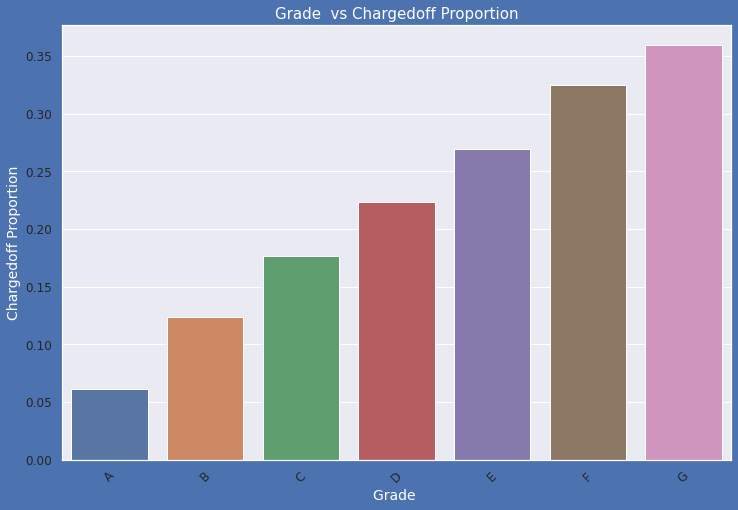

In [1011]:
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Grade  vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='grade', y='Chargedoff_Proportion', data=grade_vs_loan)
ax1.set_xlabel('Grade ',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.xticks(rotation=45)
plt.show()

#### Observation
+ Grade A has the least proportion of people defaulting on their loans.
+ Grade F and G have high charged off proportion
+ Chances of getting charged off is increasing with grades moving from A to G

In [1012]:
subgrade_vs_loan=df.groupby(['sub_grade','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
subgrade_vs_loan['Total']=grade_vs_loan['Charged Off'] + grade_vs_loan['Fully Paid']
subgrade_vs_loan['ChargedOff_Proportion']=grade_vs_loan['Charged Off']/grade_vs_loan['Total']
subgrade_vs_loan.sort_values('ChargedOff_Proportion',ascending=False)

loan_status,sub_grade,Charged Off,Fully Paid,Total,ChargedOff_Proportion
4,5,1122,6308,2437,0.269183
3,4,1083,6596,4820,0.223444
2,3,1115,6430,7467,0.176912
1,2,1104,6150,11096,0.124009
0,1,978,5720,9646,0.061476


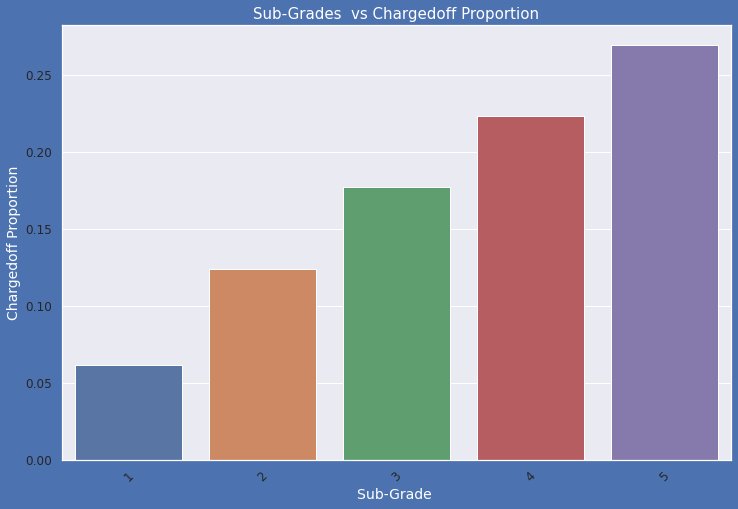

In [1013]:
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Sub-Grades  vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='sub_grade', y='ChargedOff_Proportion', data=subgrade_vs_loan)
ax1.set_xlabel('Sub-Grade ',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.xticks(rotation=45)
plt.show()

In [1014]:
verify_vs_loan = df.groupby(['verification_status','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
verify_vs_loan['Total'] = verify_vs_loan['Charged Off']+verify_vs_loan['Fully Paid']
verify_vs_loan['ChargedOff_Proportion'] = verify_vs_loan['Charged Off']+verify_vs_loan['Total']
verify_vs_loan.sort_values('ChargedOff_Proportion',ascending=False)

loan_status,verification_status,Charged Off,Fully Paid,Total,ChargedOff_Proportion
0,Not Verified,2089,14164,16253,18342
2,Verified,1943,9266,11209,13152
1,Source Verified,1370,7774,9144,10514


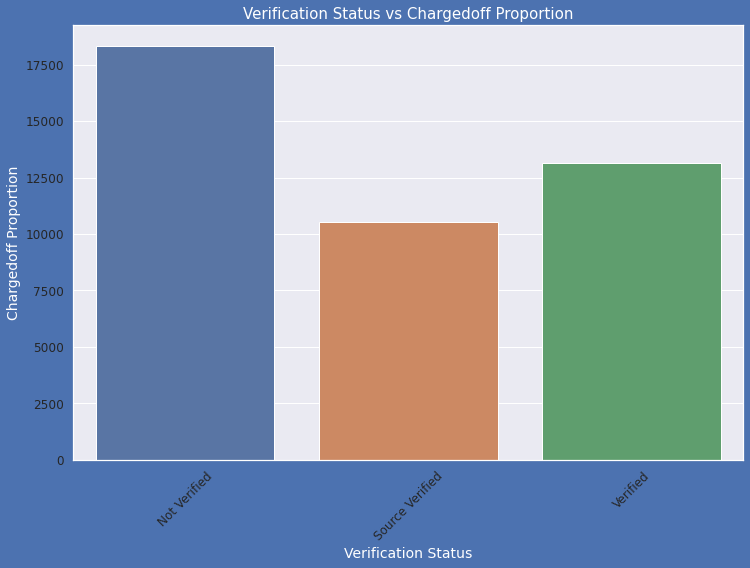

In [1016]:
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Verification Status vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='verification_status', y='ChargedOff_Proportion', data=verify_vs_loan)
ax1.set_xlabel('Verification Status',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.xticks(rotation=45)
plt.show()

#### Observation - 
As there is not much difference in Charged off proportions, the variable doesn't provide any insight on Charged Off Proportion

In [1017]:
bankruptcies_vs_loan = df.groupby(['pub_rec','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
bankruptcies_vs_loan['Total'] = bankruptcies_vs_loan['Charged Off'] + bankruptcies_vs_loan['Fully Paid'] 
bankruptcies_vs_loan['Chargedoff_Proportion'] = bankruptcies_vs_loan['Charged Off'] / bankruptcies_vs_loan['Total']
bankruptcies_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,pub_rec,Charged Off,Fully Paid,Total,Chargedoff_Proportion
1,1,449.0,1514.0,1963.0,0.228732
2,2,10.0,36.0,46.0,0.217391
0,0,4943.0,29646.0,34589.0,0.142907
3,3,0.0,6.0,6.0,0.000000
4,4,0.0,2.0,2.0,0.000000


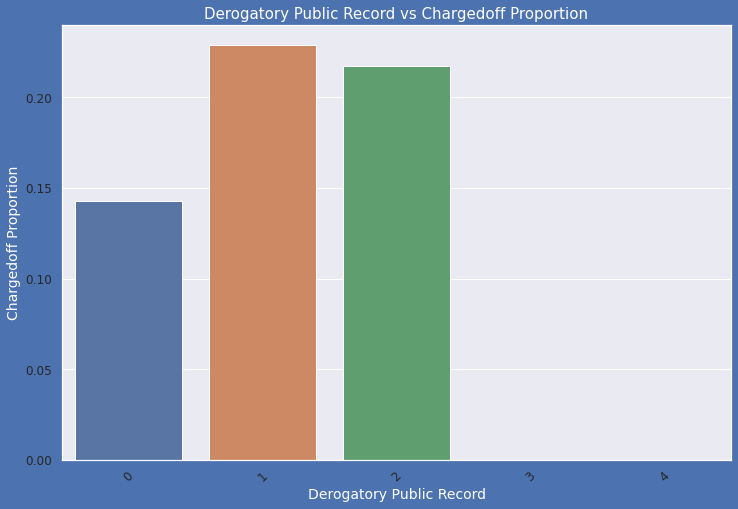

In [1018]:
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Derogatory Public Record vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='pub_rec', y='Chargedoff_Proportion', data=bankruptcies_vs_loan)
ax1.set_xlabel('Derogatory Public Record',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.xticks(rotation=45)
plt.show()

#### Observation - 
+ Those who already have pub_rec value 1 or 2 have charged off chances higher than who have no Derogatory Public Record.
+ pub_rec count 3-4 has less numbers so cannot reach on any conclusions.

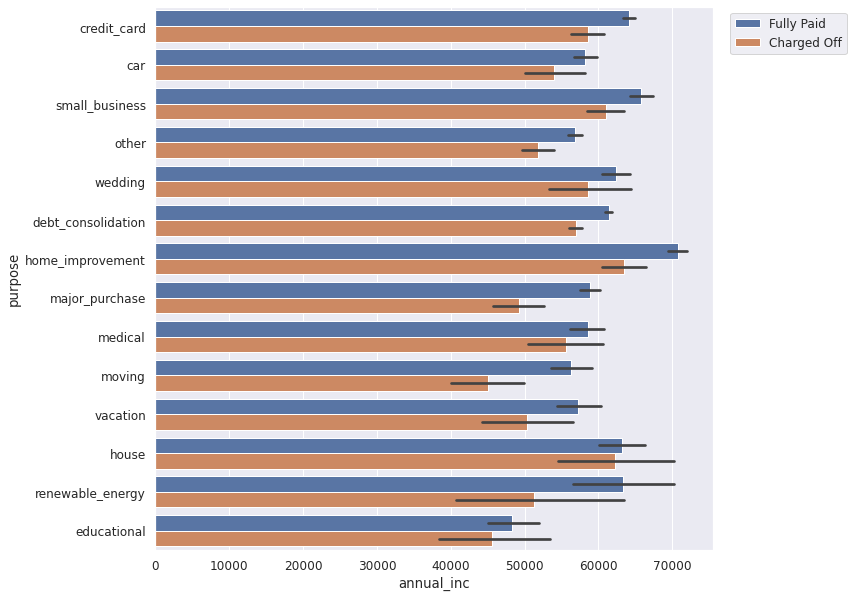

In [1019]:
plt.figure(figsize=(10,10))
sns.barplot(data =df,x='annual_inc', y='purpose', hue ='loan_status',palette="deep")
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()

<AxesSubplot:xlabel='annual_inc_b', ylabel='loan_amnt'>

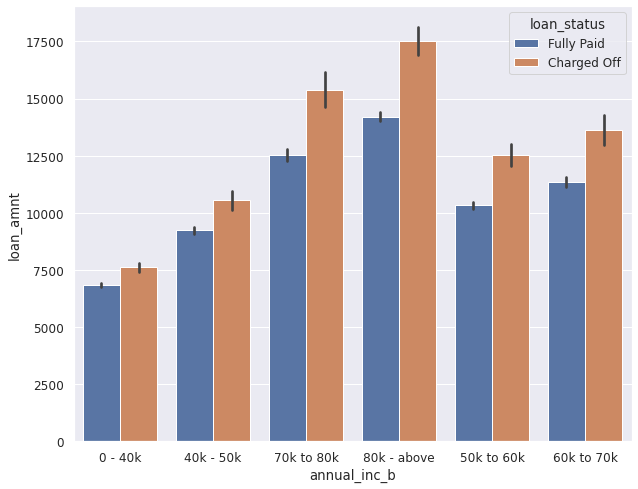

In [1236]:
plt.figure(figsize=(10,8))
sns.barplot(x = "annual_inc_b", y = "loan_amnt", hue = 'loan_status', data = df)

#### Observation
Across all the income groups, the loan_amount is higher for people who defaulted.

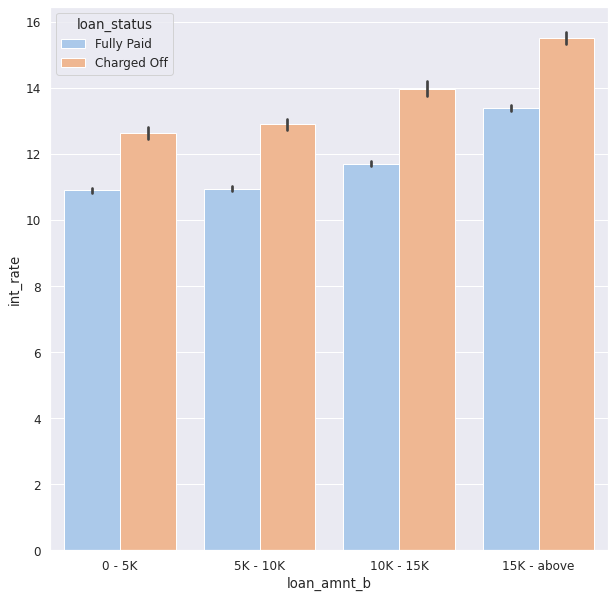

In [1024]:
plt.figure(figsize=(10,10))
sns.barplot(data =df,x='loan_amnt_b', y='int_rate', hue ='loan_status',palette="pastel")
plt.show()
#same as above. select which one to use

#### Observation
The interest rate for charged off loans is pretty high than that of fully paid loans in all the loan_amount groups. This can be a pretty strong driving factor for loan defaulting.

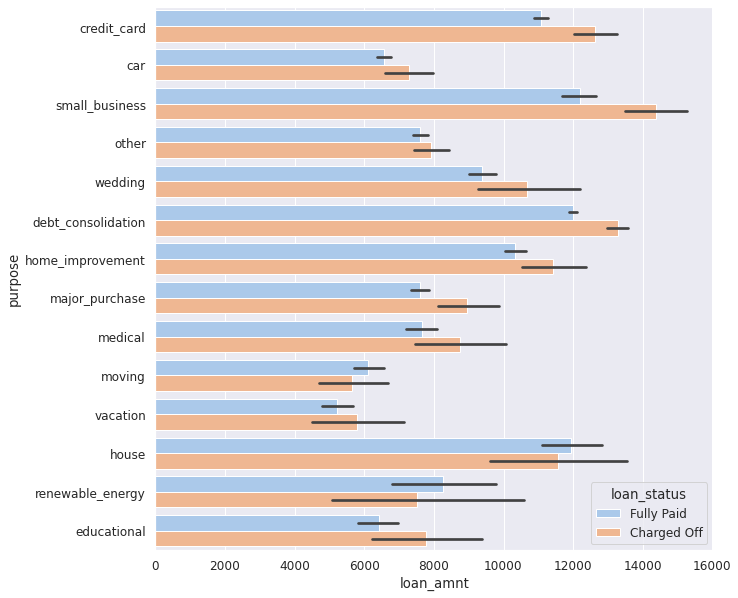

In [1026]:
plt.figure(figsize=(10,10))
sns.barplot(data =df,x='loan_amnt', y='purpose', hue ='loan_status',palette="pastel")
plt.show()

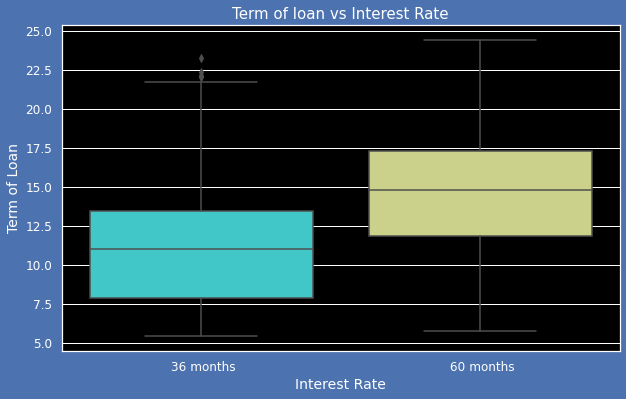

In [1027]:
with plt.style.context('dark_background'):
  plt.figure(figsize=(10,6),facecolor='b')
  ax=sns.boxplot(y='int_rate',x='term',data=df,palette='rainbow')
  ax.set_title('Term of loan vs Interest Rate',fontsize=15,color='w')
  ax.set_xlabel('Interest Rate',fontsize=14,color='w')
  ax.set_ylabel('Term of Loan',fontsize=14,color='w')
  plt.show()

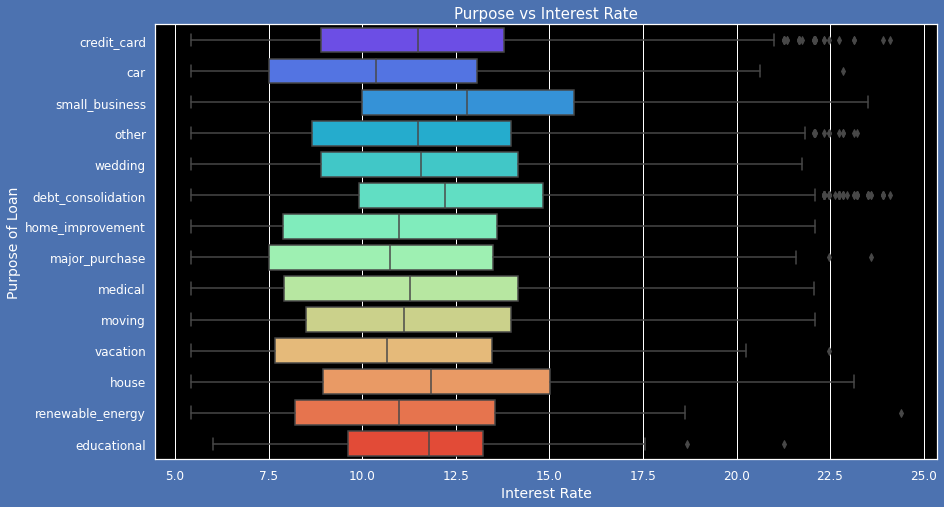

In [1028]:
with plt.style.context('dark_background'):
  plt.figure(figsize=(14,8),facecolor='b')
  ax = sns.boxplot(x='int_rate', y='purpose', data =df,palette='rainbow')
  ax.set_title('Purpose vs Interest Rate',fontsize=15,color='w')
  ax.set_xlabel('Interest Rate',fontsize=14,color = 'w')
  ax.set_ylabel('Purpose of Loan',fontsize=14,color = 'w')
  plt.show()

#### Observations - 
+ It is clear that avearge intrest rate is highest for small business purpose.
+ Loans taken for small business purposes had to repay the loan with more intrest rate as compared to other.Debt consolidation is 2nd where borrowers had to pay more interest rate.

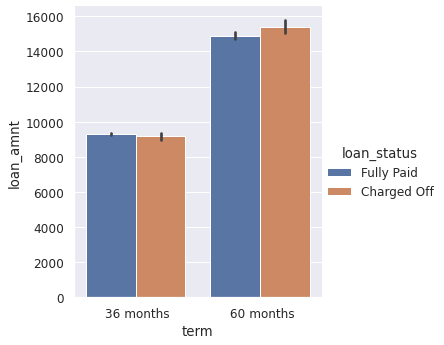

In [1255]:
sns.catplot(x = 'term', y = 'loan_amnt', data = df,hue = 'loan_status', kind = 'bar') 

#### Observations -
It is clear that intrest rate is increasing with loan amount increase.probably when loan amount is more it is taken for longer loan term, we saw earlier that longer the loan term more the interest rates.

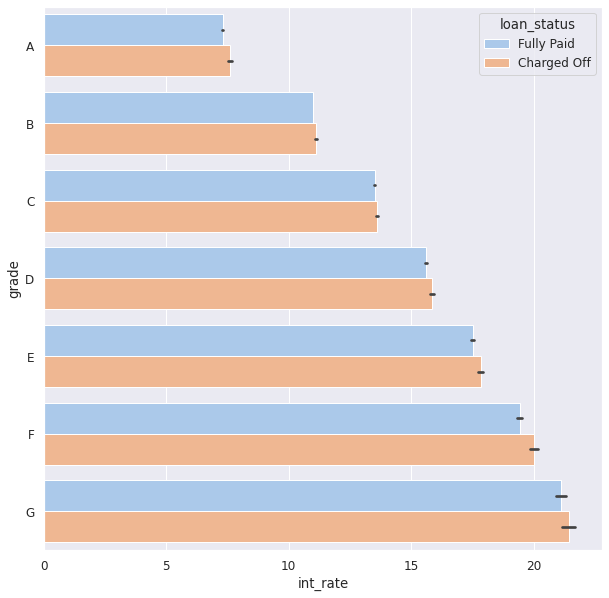

In [1035]:
plt.figure(figsize=(10,10))
sns.barplot(data =df,x='int_rate', y='grade', hue ='loan_status',palette="pastel", order=['A','B','C','D','E','F','G'])
plt.show()

#### Observations -
A-grade is a top letter grade for a lender to assign to a borrower.
The higher the borrower's credit grade,the lower the interest rate offered to that borrower on a loan.
It is clear that intrest rate is increasing with grades moving from A to F.

## Observations from Analysis
### The above analysis with respect to the charged off loans. There is a more probability of defaulting when :
+ Applicants taking loan for 'home improvement' and have income of 60k -70k
+ Applicants whose home ownership is 'MORTGAGE and have income of 60-70k
+ Applicants who receive interest at the rate of 21-24% and have an income of 70k-80k
+ Applicants who have taken a loan in the range 30k - 35k and are charged interest rate of 15-17.5 %
+ Applicants who have taken a loan for small business and the loan amount is greater than 14k
+ Applicants whose home ownership is 'MORTGAGE and have loan of 14-16k
+ When grade is F and loan amount is between 15k-20k
+ When employment length is 10yrs and loan amount is 12k-14k
+ When the loan is verified and loan amount is above 16k
+ For grade G and interest rate above 20%